In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arjunbhasin2013_ccdata_path = kagglehub.dataset_download('arjunbhasin2013/ccdata')

print('Data source import complete.')


In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df=df.drop('CUST_ID',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
missing_values = df.isnull().sum()
missing_values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
missing_values/df.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [ ]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
missing_values = df.isnull().sum()
missing_values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Assuming df is already loaded and preprocessed

# Select only numerical columns for outlier detection
numerical_df = df.select_dtypes(include=[np.number])

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # Assume 5% of the data are outliers

# Fit the model and predict outliers
outliers_iso = iso_forest.fit_predict(numerical_df)

# Convert -1 (outliers) to True and 1 (inliers) to False
outliers_iso = outliers_iso == -1

# Remove outliers from the original dataframe based on the indices
df_no_outliers_iso = df[~outliers_iso]

# Check the number of outliers removed
print(f"Rows before outlier removal (Isolation Forest): {df.shape[0]}")
print(f"Rows after outlier removal (Isolation Forest): {df_no_outliers_iso.shape[0]}")
print(f"Number of outliers removed (Isolation Forest): {df.shape[0] - df_no_outliers_iso.shape[0]}")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Rows before outlier removal (Isolation Forest): 8950
Rows after outlier removal (Isolation Forest): 8502
Number of outliers removed (Isolation Forest): 448


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Silhouette Scores:
KMeans (Original Data): 0.2505
KMeans (PCA Data): 0.4509
Hierarchical (Original Data): 0.1731
Hierarchical (PCA Data): 0.3382
Spectral (Original Data): 0.1592
Spectral (PCA Data): 0.2791

Dunn Index Results:
KMeans (Original Data): 0.0038
KMeans (PCA Data): 0.0002
Hierarchical (Original Data): 0.0083
Hierarchical (PCA Data): 0.0008
Spectral (Original Data): 0.0009
Spectral (PCA Data): 0.0006


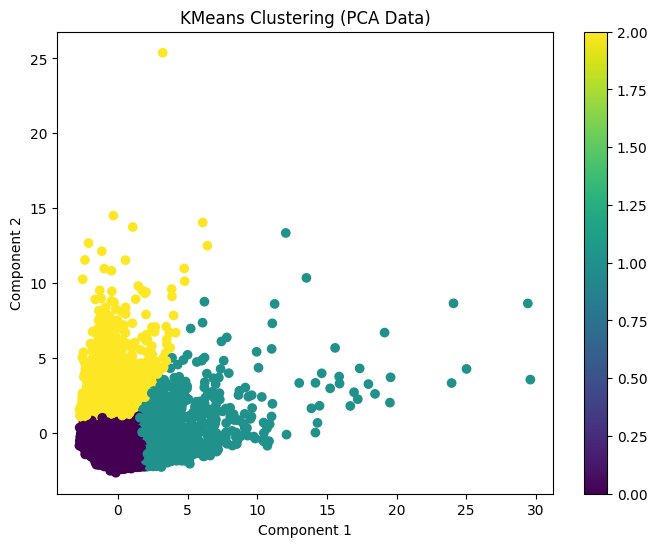

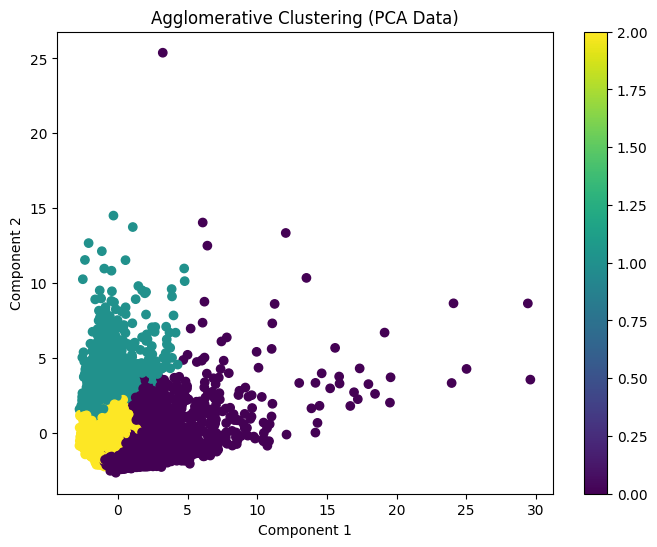

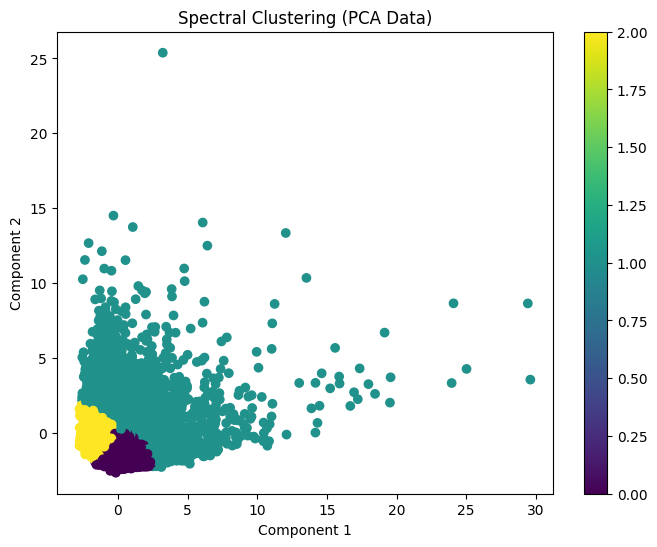

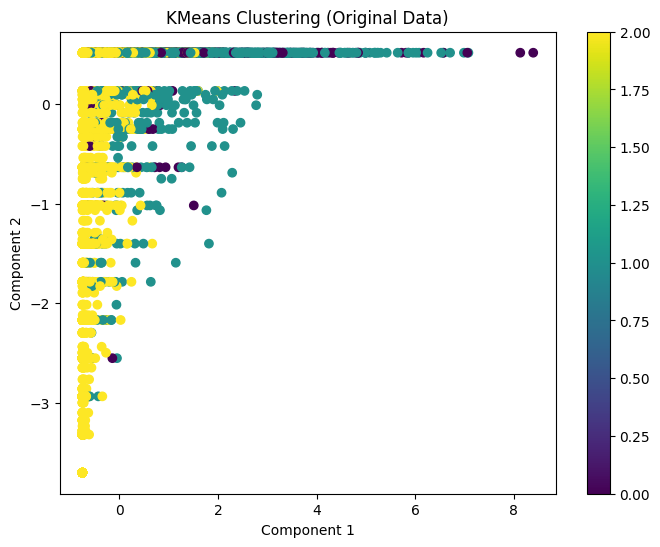

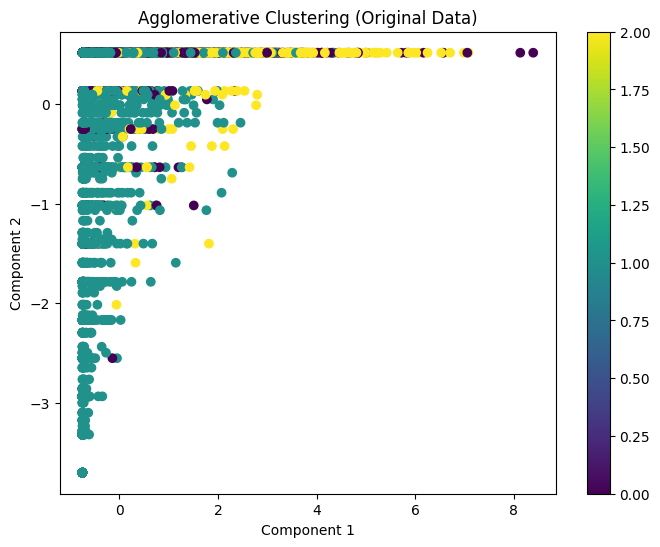

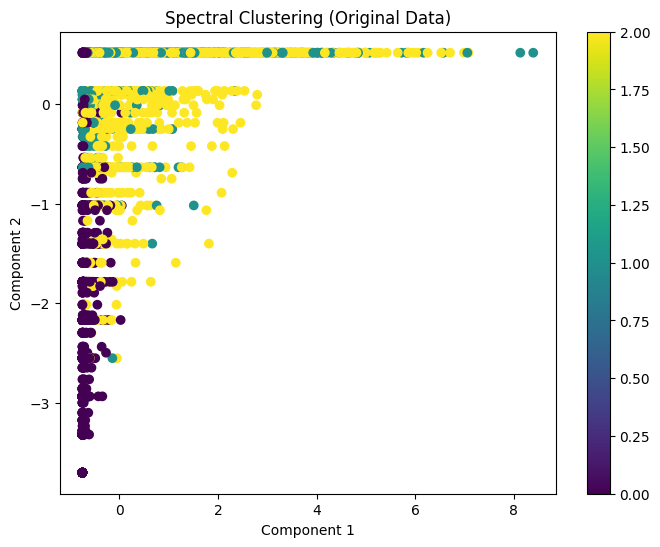

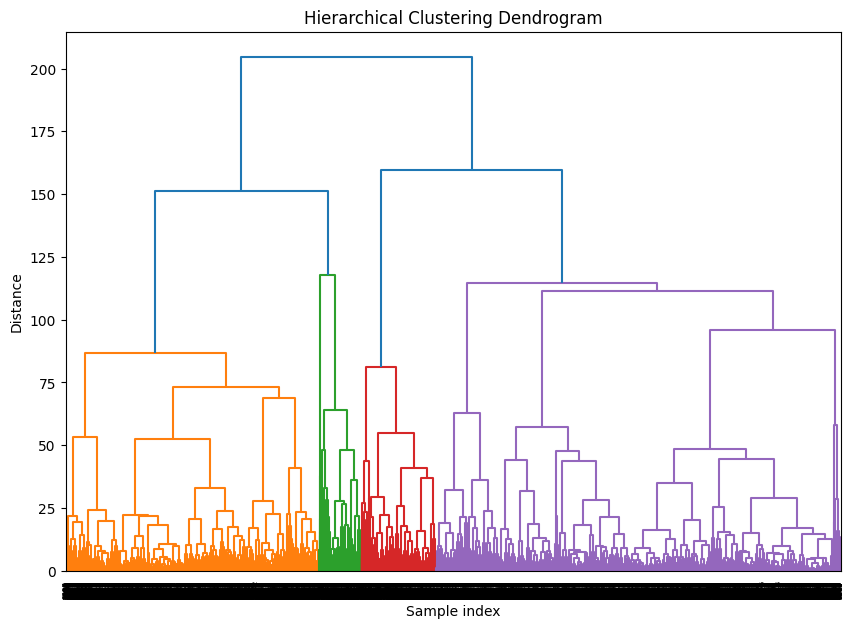

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# Standardize the data (if not already done)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA: Reduce the dimensionality of the dataset to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 1. KMeans Clustering (Original Data and PCA Reduced Data)
def run_kmeans(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Explicitly set n_init
    labels = kmeans.fit_predict(data)
    return labels, kmeans

# 2. Hierarchical Agglomerative Clustering (Original Data and PCA Reduced Data)
def run_hierarchical_clustering(data, n_clusters=3):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(data)
    return labels

# 3. Spectral Clustering (Original Data and PCA Reduced Data)
def run_spectral_clustering(data, n_clusters=3):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels = spectral.fit_predict(data)
    return labels

# Calculate silhouette score for evaluation
def calculate_silhouette(data, labels):
    return silhouette_score(data, labels)

# Dunn Index Calculation
def dunn_index(data, labels):
    n = len(labels)
    clusters = np.unique(labels)

    # Calculate inter-cluster distance (minimum distance between any two clusters)
    inter_cluster_distances = []
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            points_i = data[labels == clusters[i]]
            points_j = data[labels == clusters[j]]
            dist = np.min(pairwise_distances(points_i, points_j))  # Min distance between points in different clusters
            inter_cluster_distances.append(dist)

    min_inter_cluster_dist = np.min(inter_cluster_distances)

    # Calculate intra-cluster distance (maximum distance within any cluster)
    intra_cluster_distances = []
    for cluster in clusters:
        points = data[labels == cluster]
        intra_cluster_distances.append(np.max(cdist(points, points)))  # Max distance within the cluster

    max_intra_cluster_dist = np.max(intra_cluster_distances)

    # Dunn Index = min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# Function to plot hierarchical clustering dendrogram
def plot_dendrogram(data):
    # Compute the linkage matrix
    Z = linkage(data, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Run KMeans, Hierarchical, and Spectral Clustering on Original and PCA Reduced Data
kmeans_labels_original, kmeans_model_original = run_kmeans(df_scaled)
kmeans_labels_pca, kmeans_model_pca = run_kmeans(df_pca)

hierarchical_labels_original = run_hierarchical_clustering(df_scaled)
hierarchical_labels_pca = run_hierarchical_clustering(df_pca)

spectral_labels_original = run_spectral_clustering(df_scaled)
spectral_labels_pca = run_spectral_clustering(df_pca)

# Silhouette scores for each method
silhouette_kmeans_original = calculate_silhouette(df_scaled, kmeans_labels_original)
silhouette_kmeans_pca = calculate_silhouette(df_pca, kmeans_labels_pca)

silhouette_hierarchical_original = calculate_silhouette(df_scaled, hierarchical_labels_original)
silhouette_hierarchical_pca = calculate_silhouette(df_pca, hierarchical_labels_pca)

silhouette_spectral_original = calculate_silhouette(df_scaled, spectral_labels_original)
silhouette_spectral_pca = calculate_silhouette(df_pca, spectral_labels_pca)

# Dunn Index for each method
dunn_kmeans_original = dunn_index(df_scaled, kmeans_labels_original)
dunn_kmeans_pca = dunn_index(df_pca, kmeans_labels_pca)

dunn_hierarchical_original = dunn_index(df_scaled, hierarchical_labels_original)
dunn_hierarchical_pca = dunn_index(df_pca, hierarchical_labels_pca)

dunn_spectral_original = dunn_index(df_scaled, spectral_labels_original)
dunn_spectral_pca = dunn_index(df_pca, spectral_labels_pca)

# Display the results
print("Silhouette Scores:")
print(f"KMeans (Original Data): {silhouette_kmeans_original:.4f}")
print(f"KMeans (PCA Data): {silhouette_kmeans_pca:.4f}")
print(f"Hierarchical (Original Data): {silhouette_hierarchical_original:.4f}")
print(f"Hierarchical (PCA Data): {silhouette_hierarchical_pca:.4f}")
print(f"Spectral (Original Data): {silhouette_spectral_original:.4f}")
print(f"Spectral (PCA Data): {silhouette_spectral_pca:.4f}")

print("\nDunn Index Results:")
print(f"KMeans (Original Data): {dunn_kmeans_original:.4f}")
print(f"KMeans (PCA Data): {dunn_kmeans_pca:.4f}")
print(f"Hierarchical (Original Data): {dunn_hierarchical_original:.4f}")
print(f"Hierarchical (PCA Data): {dunn_hierarchical_pca:.4f}")
print(f"Spectral (Original Data): {dunn_spectral_original:.4f}")
print(f"Spectral (PCA Data): {dunn_spectral_pca:.4f}")

# Plotting the clusters for each method on PCA-reduced data
plot_clusters(df_pca, kmeans_labels_pca, "KMeans Clustering (PCA Data)")
plot_clusters(df_pca, hierarchical_labels_pca, "Agglomerative Clustering (PCA Data)")
plot_clusters(df_pca, spectral_labels_pca, "Spectral Clustering (PCA Data)")

# Plotting the clusters for each method on Original Data
plot_clusters(df_scaled, kmeans_labels_original, "KMeans Clustering (Original Data)")
plot_clusters(df_scaled, hierarchical_labels_original, "Agglomerative Clustering (Original Data)")
plot_clusters(df_scaled, spectral_labels_original, "Spectral Clustering (Original Data)")

# Plot the hierarchical clustering dendrogram for the original data
plot_dendrogram(df_scaled)
